In [81]:
import pandas as pd

In [145]:
df = pd.read_excel('Dirtydata.xlsx')

In [146]:
df.style.highlight_null()

,CustomerID,First_name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,709/909/901,298 Drugs Driveway,N,nan,True
3,1004,Dwayne,Shurlle,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Yes,True
4,1005,John,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,nan,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,nan,N/a,123 Middle Earth,Yes,nan,False
9,1010,Peter,...Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


<AxesSubplot:>

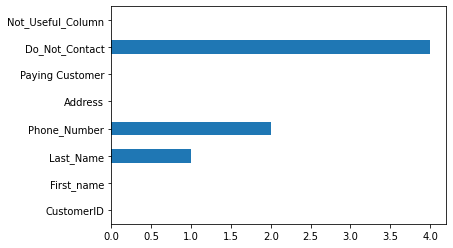

In [84]:
df.isna().sum().plot(kind='barh')

# df['Last_Name'].isnull().sum()

### checking for duplicate rows

In [85]:
df.duplicated().sum()  #checking on rows

df['Last_Name'].duplicated().sum()

1

### showing the duplicate rows

In [86]:
df.loc[df.duplicated()]

,CustomerID,First_name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
20,1020,Anakin,Skywalker,876|678|3469,"910 Tatooine Road, Tatooine",Yes,N,True


### drop duplicates

In [87]:
df.shape

(21, 8)

In [88]:
df.drop_duplicates(inplace=True)

## Dropping Column(s)

In [89]:
df.drop(columns = 'Not_Useful_Column',inplace=True) #drop 1 column
# df.drop(columns = ['Not_Useful_Column','Paying_Customer']) #drop 2 columns

### Dropping Index(es)

In [90]:
# df.drop(index = 1) #drop 1 row
df.drop(index = [1,4,5])  #dropping 2 rows

df.loc[df['First_name'].str[0] == 'S'].index
df.loc[df['First_name'].str.contains('^S')].index


df.drop(index = df.loc[df['First_name'].str[0] == 'S'].index).shape

(18, 7)

In [91]:
df['First_name'] = df['First_name'].str.upper()

## Lstrip, Rstrip and Strip

In [92]:
df['Last_Name'].str.lstrip('/.')

df['Last_Name'].str.rstrip('_')

df['Last_Name'] = df['Last_Name'].str.strip('/._').fillna('Unknown')

## Replace Method

In [95]:
df['Phone_Number'].str.replace('/','-')

df['Phone_Number'].str.replace('[#/|]','-',regex=True)

df['Phone_Number'].str.replace('[^0-9]','',regex=True)

df['Phone_Number'] = df['Phone_Number'].str.replace('[^0-9]','').fillna(0)

In [100]:
df['Phone_Number'] = '090'+ df['Phone_Number'].astype('str')

In [106]:
df['Paying Customer'] = df['Paying Customer'].str.replace('Yes','Y')
df['Paying Customer'] = df['Paying Customer'].str.replace('No','N')
df['Paying Customer'] = df['Paying Customer'].str.replace('N/a','N')

In [119]:
def maker(value):
    if value == 'S':
        return 1
    elif value == 'Q':
        return 2
    else:
        return 3

In [120]:
df['test'] = df['Paying Customer'].apply(maker)

### Split Method

In [129]:
df['StreetNo'] = df['Address'].str.split(' ',expand=True)[0].str.replace('[^0-9]','')

C:\Users\moe_shittu\AppData\Local\Temp\ipykernel_16496\3630928827.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['StreetNo'] = df['Address'].str.split(' ',expand=True)[0].str.replace('[^0-9]','')


In [132]:
df[['StreetName','State','ZipCode']] = df['Address'].str.split(',',expand=True)

In [143]:
pd.to_numeric(df['Phone_Number'])

0     901235455421
1     901236439775
2      90709909901
3     901235432345
4     908766783469
5     903047622467
6              900
7     908766783469
8               90
9     901235455421
10             900
11     90706695039
12    901235432345
13    908766783469
14    903047622467
15    901235455421
16    901236439775
17     90709909901
18              90
19    908766783469
Name: Phone_Number, dtype: int64

# DateTime

In [147]:
db = pd.read_excel(r"C:\Users\moe_shittu\Desktop\Dirtydata.xlsx")

In [162]:
# db['DOB'].dt.year
# db['DOB'].dt.month
# db['DOB'].dt.day

db.loc[db['DOB'].dt.year > 1997].shape

(16, 9)

In [167]:
db['Age'] = pd.Timestamp.today().year - db['DOB'].dt.year

In [173]:
pd.Timestamp.now().time()

datetime.time(4, 0, 49, 317388)

In [ ]:
df.to_dict()